# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# Check the present working directory
#!pwd

### Download the data
If you do not have the required **data/** directory in your workspace, follow the instructions below. Use either one of the methods below. 

**Method 1** <br/>
You must [download this dataset](https://video.udacity-data.com/topher/2024/August/66b9ba05_arvato_data.tar/arvato_data.tar.gz) from the Downloads section in the classroom, and upload it into the workspace. After you upload the tar file to the present working  directory, **/workspace/cd1971 Data Scientist Capstone/Bertelsmann_Arvato Project Workspace/**,  in the Jupyter server, you can open a terminal and the run the following command to extract the dataset from the compressed file. 
```bash
!tar -xzvf arvato_data.tar.gz
```
This command will extract all the contents of arvato_data.tar.gz into the current directory. 

**Method 2** <br/>
Execute the Python code below to download the dataset. 


In [2]:
#import requests
#import tarfile
#import os


#def download_and_extract(url, extract_to='.'):
#    """
#    Downloads a tar.gz file from a URL and extracts it to a directory.
#    Args:
#    - url (str): URL of the tar.gz file to download.
#    - extract_to (str): Directory path to extract the contents of the tar.gz file.
#    """
    # Get the filename from the URL
#    filename = url.split('/')[-1]

    # Download the file
#    print("Downloading the file...")
#    response = requests.get(url, stream=True)
#    if response.status_code == 200:
#        with open(filename, 'wb') as file:
#            file.write(response.raw.read())
#        print("Download completed.")
#    else:
#        print("Failed to download the file.")
#        return

    # Extract the tar.gz file
#    print("Extracting the file...")
#    try:
#        with tarfile.open(filename, 'r:gz') as tar:
#            tar.extractall(path=extract_to)
#        print("Extraction completed.")
#    except Exception as e:
#        print(f"Failed to extract the file: {e}")
#    finally:
        # Optionally remove the tar.gz file after extraction
#        os.remove(filename)
#        print("Downloaded tar.gz file removed.")

# URL of the tar.gz file
#url = 'https://video.udacity-data.com/topher/2024/August/66b9ba05_arvato_data.tar/arvato_data.tar.gz'

# Call the function with the URL
#download_and_extract(url)




### Important Note
>Delete the **data/** folder and the downloaded tar file, before you submit your code. The current workspace cannot save the files beyond 1GB of space in total. 


### Import the Packages

In [3]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

>Note: If you experience "Kernel died" issue while running the codeblock below, then load less number of rows from the .csv files.

## Read in data and data overview

In [4]:
%%time
# load in the data
#since I experienced the Kernel died issues, I decided to only use 500k rows of data
azdias = pd.read_csv('data/Udacity_AZDIAS_052018.csv', sep=';', low_memory=False, nrows=100000)
customers = pd.read_csv('data/Udacity_CUSTOMERS_052018.csv', sep=';', low_memory=False)

CPU times: user 6.58 s, sys: 2.17 s, total: 8.76 s
Wall time: 9.92 s


In [5]:
# Check the structure of the azdias data 
print(azdias.shape)
azdias.head(5)

(100000, 366)


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [6]:
azdias.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,1.000000e+05,100000.000000,91615.000000,91615.000000,9092.000000,3269.000000,690.000000,127.000000,70204.000000,89474.000000,...,86591.000000,91324.000000,91324.000000,91324.000000,87798.000000,91615.000000,89474.000000,100000.000000,100000.00000,100000.000000
mean,6.447696e+05,-0.362940,4.456170,10.875763,11.771887,13.392781,14.455072,14.937008,13.720372,8.293918,...,2.423612,6.022732,7.566357,5.977114,3.937254,7.908803,4.040459,3.376100,1.52412,2.774440
std,2.539922e+05,1.196708,3.644775,7.633329,4.107494,3.289373,2.759101,2.653982,5.068927,15.220064,...,1.168891,2.854200,3.247799,2.775939,1.961093,1.924711,1.935331,1.347148,0.49942,1.067864
min,1.994820e+05,-1.000000,1.000000,0.000000,2.000000,4.000000,5.000000,8.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000
25%,4.218768e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,13.000000,11.000000,2.000000,...,2.000000,4.000000,6.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.00000,2.000000
50%,6.590125e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,4.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.00000,3.000000
75%,8.673522e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,10.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.00000,4.000000
max,1.081513e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,377.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.00000,9.000000


In [7]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 366 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(6)
memory usage: 279.2+ MB


In [8]:
# Check the structure of the azdias data 
print(customers.shape)
customers.head(5)

(191652, 369)


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [9]:
customers.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,191652.000000,191652.000000,145056.000000,145056.000000,11766.000000,5100.000000,1275.000000,236.000000,139810.000000,141725.000000,...,143781.000000,143781.000000,143781.000000,137910.000000,145056.000000,141725.000000,191652.000000,191652.000000,191652.000000,191652.000000
mean,95826.500000,0.344359,1.747525,11.352009,12.337243,13.672353,14.647059,15.377119,10.331579,4.965863,...,4.374417,4.564769,3.168868,4.152716,8.646371,3.723133,2.576806,0.090247,1.376432,3.060907
std,55325.311233,1.391672,1.966334,6.275026,4.006050,3.243335,2.753787,2.307653,4.134828,14.309694,...,2.924355,2.887035,2.233516,1.974375,1.154001,2.095540,1.168486,0.286536,0.484492,1.086254
min,1.000000,-1.000000,1.000000,0.000000,2.000000,2.000000,5.000000,8.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,47913.750000,-1.000000,1.000000,8.000000,9.000000,11.000000,13.000000,14.000000,9.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,9.000000,2.000000,1.000000,0.000000,1.000000,3.000000
50%,95826.500000,0.000000,1.000000,11.000000,13.000000,14.000000,15.000000,16.000000,10.000000,1.000000,...,4.000000,4.000000,3.000000,5.000000,9.000000,3.000000,3.000000,0.000000,1.000000,3.000000
75%,143739.250000,2.000000,1.000000,16.000000,16.000000,16.000000,17.000000,17.000000,13.000000,4.000000,...,7.000000,7.000000,4.000000,6.000000,9.000000,5.000000,3.000000,0.000000,2.000000,4.000000
max,191652.000000,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,523.000000,...,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,1.000000,2.000000,9.000000


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Columns: 369 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(94), object(8)
memory usage: 539.5+ MB


As we can see above, there are quite a lot of NaN Values. Addtionally when looking at the min values of a lot of columns often see negative values which correspend to missing values as well (as seen in the Attributes explanation). This has to be modified before we can begin our Analysis

## Data Preparation 

### Cleaning the dataset

Using the descripitve files for the azdias dataset a csv file was created that contains all features and their flags/markers for unkown numbers. This was kind of challenging because the features of the dataset and the descripition didn't match 100% and some renaming had to be done. Additionally the description for some features was missing.

In [11]:
azdias_features=pd.read_csv('azdias_features_241108.csv', sep=';')
azdias_features.head(5)

,Feature,Type,Unknown
0,AGER_TYP,categorical,"[-1,0]"
1,ALTERSKATEGORIE_FEIN,ordinal,"[-1,0.9]"
2,ALTERSKATEGORIE_GROB,ordinal,"[-1,0,9]"
3,ALTER_HH,ordinal,[0]
4,ANREDE_KZ,categorical,"[-1,0]"


In [12]:
azdias_features.shape

(334, 3)

### Drop unnecessary features
At first I want to drop all features that don't have a description since we don't know how to interpret these in the end. Since the features list has 334 entries and the azdias file 366, 32 features will be dropped

In [13]:
#convcert the features of azdias and features file to a list
features_list = azdias_features['Feature'].tolist()
#drop all columns not in the features list
azdias = azdias[azdias.columns.intersection(features_list)]
azdias.shape

(100000, 334)

### Convert Missing Value Codes to NaNs

In [14]:
#number of current NaN values
print(azdias.isna().sum().sum())

# first we need to convert the Unknown list so we can handle them as seperate numbers
azdias_features["Unknown"]=azdias_features["Unknown"].apply(lambda x: x[1:-1].split(','))
#Convert Missing Value Codes to NaNs
for Feature, unknown_values in zip(azdias_features['Feature'], azdias_features['Unknown']):
    if unknown_values[0] != '':
        for value in unknown_values:
            # check if value is numeric (remove - for negative numbers)
            if value.isnumeric() or value.lstrip('-').isnumeric():
                value = int(value)
            azdias[Feature] = azdias[Feature].replace(value, np.nan)
            
# new number of NaN values
azdias.isna().sum().sum()

3106711


8766169

In [15]:
#check compared to the initial dataset looks good
azdias.head(5)

,AGER_TYP,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,SOHO_KZ,TITEL_KZ,UNGLEICHENN_FLAG,VERS_TYP,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2.0
1,NaN,NaN,21.0,11.0,0.0,0.0,2.0,12.0,0.0,3.0,...,1.0,NaN,1.0,2.0,3.0,9.0,4.0,5,2,1.0
2,NaN,17.0,17.0,10.0,0.0,0.0,1.0,7.0,0.0,3.0,...,0.0,NaN,0.0,1.0,3.0,9.0,2.0,5,2,3.0
3,2.0,13.0,13.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,NaN,0.0,1.0,NaN,9.0,7.0,3,2,4.0
4,NaN,20.0,14.0,3.0,0.0,0.0,4.0,3.0,0.0,4.0,...,0.0,NaN,0.0,2.0,2.0,9.0,3.0,4,1,3.0


## Assess Missing Data 

Since we have a lot of NaN Values we will look at the structure of the missing data. We will foucs if there are any outliers in the columns or rows that have a lot of NaN values and therefore can be dropped


#### Mssing Data per Column

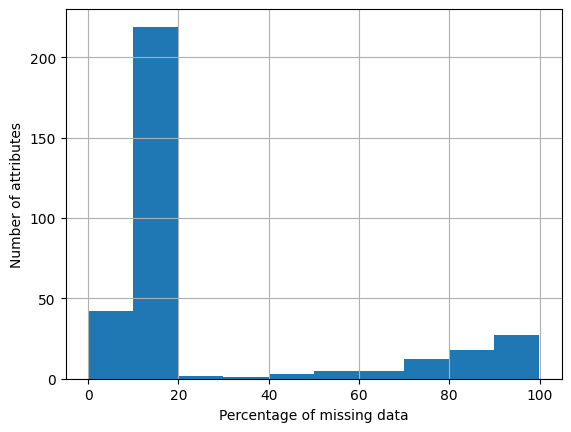

In [16]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
missing_data = azdias.isnull().sum()
missing_data = missing_data/len(azdias)*100
missing_data.sort_values(ascending=False,inplace=True)
plt.hist(missing_data)
plt.xlabel('Percentage of missing data')
plt.ylabel('Number of attributes')
plt.grid(True)
plt.show()

It looks like there is a threshold at around 20% of missing data so we will use this as a dropoff point and cut all columns with more than 20% missing data

In [17]:
# Remove the outlier columns from the dataset. 
# drop everything with missing percentage over 20

drop_columns=missing_data[missing_data > 20].index
print(drop_columns)
azdias.drop(columns=drop_columns,axis=1,inplace=True)

Index(['D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12', 'TITEL_KZ',
       'D19_VERSI_ONLINE_DATUM', 'D19_TELKO_ONLINE_DATUM', 'D19_BANKEN_LOKAL',
       'D19_BANKEN_OFFLINE_DATUM', 'D19_TELKO_ANZ_12',
       'D19_VERSI_OFFLINE_DATUM', 'D19_DIGIT_SERV', 'D19_BIO_OEKO',
       'D19_NAHRUNGSERGAENZUNG', 'D19_GARTEN', 'D19_TIERARTIKEL',
       'D19_BANKEN_ONLINE_QUOTE_12', 'D19_LEBENSMITTEL', 'D19_WEIN_FEINKOST',
       'D19_BANKEN_ANZ_12', 'D19_ENERGIE', 'D19_TELKO_ANZ_24',
       'D19_BANKEN_REST', 'D19_VERSI_ANZ_12', 'D19_TELKO_OFFLINE_DATUM',
       'D19_BILDUNG', 'D19_BEKLEIDUNG_GEH', 'D19_RATGEBER',
       'D19_SAMMELARTIKEL', 'D19_BANKEN_ANZ_24', 'D19_FREIZEIT',
       'D19_BANKEN_GROSS', 'D19_VERSI_ANZ_24', 'D19_SCHUHE', 'D19_HANDWERK',
       'D19_TELKO_REST', 'D19_SOZIALES', 'D19_DROGERIEARTIKEL',
       'D19_KINDERARTIKEL', 'D19_LOTTO', 'D19_KOSMETIK', 'D19_REISEN',
       'D19_VERSAND_REST', 'D19_BANKEN_DIREKT', 'D19_BANKEN_ONLINE_DATUM',
       'D19_TELKO_MOBILE', 'D

In [18]:
azdias.shape

(100000, 261)

We were able to drop ca. 70 Columns with this approach. Most of the columns are D19_* columns which have information about recent transactions. So it makes sense that there are lot of missing values since this is pretty specific.

#### Missing data per row

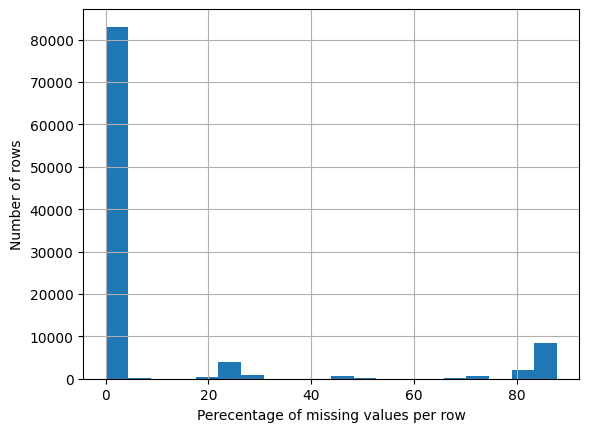

In [19]:
missing_row_data = azdias.isnull().sum(axis=1)
missing_row_data.sort_values(ascending=False,inplace=True)
plt.hist(missing_row_data*100/azdias.shape[1],bins=20)
plt.xlabel('Perecentage of missing values per row')
plt.ylabel('Number of rows')
plt.grid(True)
plt.show()

In [20]:
#drop rows with more then 15% missing data
rows_over_15=missing_row_data[missing_row_data > 0.15].index
azdias=azdias.drop(rows_over_15)
azdias.shape

(69315, 261)

We decided to drop all rows with more than 15% missing values since there seems to be a threshold. This way we were able to drop about 30k rows but still have a large dataset to perform our analyis

### Handling of categorial features

We will look if we can encode these variables or decide to drop them

In [21]:
azdias_features_cleaned = azdias_features[azdias_features.Feature.isin(azdias.columns.tolist())]
print(azdias_features_cleaned.shape)
azdias_features_cleaned.head()

(261, 3)


,Feature,Type,Unknown
2,ALTERSKATEGORIE_GROB,ordinal,"[-1, 0, 9]"
4,ANREDE_KZ,categorical,"[-1, 0]"
5,ANZ_HAUSHALTE_AKTIV,numeric,[]
6,ANZ_HH_TITEL,numeric,[]
7,ANZ_KINDER,numeric,[]


In [22]:
azdias_features_cleaned['Type'].value_counts()

Type
ordinal        226
categorical     22
numeric          9
mixed            4
Name: count, dtype: int64

In [23]:
categories_categorial=azdias_features_cleaned[azdias_features_cleaned.Type=="categorical"]
for col in categories_categorial.Feature:
    print(col, azdias[col].unique())

ANREDE_KZ [2 1]
CAMEO_DEUG_2015 ['8' '4' '6' '2' '1' '9' '5' '7' '3']
CAMEO_DEU_2015 ['8A' '4C' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5D' '9E' '9B' '1B' '8B'
 '7A' '3D' '4E' '3C' '5A' '7B' '9A' '6E' '6D' '2C' '5C' '9C' '7D' '5E'
 '1D' '8D' '6C' '5B' '7C' '4D' '3A' '2B' '7E' '4B' '2A' '3B' '6F' '5F'
 '1C' '6A']
CJT_GESAMTTYP [5. 3. 2. 4. 1. 6.]
DSL_FLAG [1. 0.]
FINANZTYP [1 5 2 4 6 3]
GEBAEUDETYP [8. 1. 3. 2. 6. 4.]
GFK_URLAUBERTYP [10.  5.  1. 12.  9.  3.  8. 11.  4.  7.  6.  2.]
GREEN_AVANTGARDE [0 1]
HH_DELTA_FLAG [0. 1.]
KONSUMZELLE [1. 0.]
LP_FAMILIE_FEIN [ 5.  1. 10.  2.  7. 11.  8.  4.  6.  9.  3.]
LP_FAMILIE_GROB [3. 1. 5. 2. 4.]
LP_STATUS_FEIN [ 2.  3.  4.  1. 10.  9.  5.  6.  7.  8.]
LP_STATUS_GROB [1. 2. 5. 4. 3.]
NATIONALITAET_KZ [1. 2. 3.]
OST_WEST_KZ ['W' 'O']
SHOPPER_TYP [3. 2. 0. 1.]
SOHO_KZ [1. 0.]
UNGLEICHENN_FLAG [1. 0.]
VERS_TYP [2. 1.]
ZABEOTYP [5 4 1 6 3 2]


We decide to drop both CAMEO columns since they have quite a lot of values and also non-numeric values. Also we decide to drop the LP_XX_FEIN values since the GROB values will sufice

In [24]:
# the above code shows we need to encode the OST_WEST_KZ. 
#We will use a 1 for W and 0 for 0
azdias["OST_WEST_KZ"].replace({'W':1,'O':0},inplace=True)
# drop categories
azdias.drop(['CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN'], axis=1, inplace=True)


### Handle mixed-variables

Next we will look at the mixed variables

In [25]:
categories_categorial=azdias_features_cleaned[azdias_features_cleaned.Type=="mixed"]
for col in categories_categorial.Feature:
    print(col, azdias[col].unique())

CAMEO_INTL_2015 ['51' '24' '43' '54' '22' '14' '13' '15' '34' '55' '41' '25' '31' '52'
 '45' '35' '33' '44' '32' '23' '12']
LP_LEBENSPHASE_FEIN [21.  3. 32.  8.  2.  5. 10.  4.  6. 20.  1. 25. 18. 31. 38. 30.  7. 22.
 35. 29. 24. 37. 12. 39. 36. 13.  9. 14. 34. 26. 33. 15. 11. 40. 16. 19.
 23. 27. 28. 17.]
LP_LEBENSPHASE_GROB [ 6.  1. 10.  2.  3.  5.  7. 12.  9. 11.  4.  8.]
PRAEGENDE_JUGENDJAHRE [14. 15.  8.  3. 10. 11.  9.  5.  4.  2.  6.  1. 12. 13.  7.]


After looking at the description we will alter the CAME_INTL variable and the PRAEGENDE_JUGENDJAHRE and will drop the two LP_LEBENSPHASE variables.
The first to variables basically alread contain the information about the lifephase

In [26]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

mainstream = [1, 3, 5, 8, 10, 12, 14] 
azdias['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if x in mainstream else 0)
#Cluster the decades
decade_cluster ={1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}

azdias['PRAEGENDE_JUGENDJAHRE_DECADE'] = azdias['PRAEGENDE_JUGENDJAHRE']
azdias['PRAEGENDE_JUGENDJAHRE_DECADE'].replace(decade_cluster, inplace=True)
azdias.drop(['PRAEGENDE_JUGENDJAHRE'], axis = 1, inplace=True)

/tmp/ipykernel_31/3351792213.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  azdias['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if x in mainstream else 0)
/tmp/ipykernel_31/3351792213.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  azdias['PRAEGENDE_JUGENDJAHRE_DECADE'] = azdias['PRAEGENDE_JUGENDJAHRE']


In [27]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
azdias['WEALTH'] = azdias['CAMEO_INTL_2015']
azdias['LIFE_STAGE'] = azdias['CAMEO_INTL_2015']

azdias['WEALTH'] = azdias['WEALTH'].apply(lambda x: np.floor(pd.to_numeric(x)/10))
azdias['LIFE_STAGE'] = azdias['LIFE_STAGE'].apply(lambda x: pd.to_numeric(x)%10)
azdias.drop(['CAMEO_INTL_2015'], axis = 1, inplace=True)

/tmp/ipykernel_31/1101804334.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  azdias['WEALTH'] = azdias['CAMEO_INTL_2015']
/tmp/ipykernel_31/1101804334.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  azdias['LIFE_STAGE'] = azdias['CAMEO_INTL_2015']


In [28]:
azdias.drop(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB'], axis=1, inplace=True)

In [29]:
azdias.shape

(69315, 257)

In [30]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69315 entries, 1 to 99998
Columns: 257 entries, ANZ_HAUSHALTE_AKTIV to LIFE_STAGE
dtypes: float64(230), int64(27)
memory usage: 136.4 MB


#### We can see now we only have numeric values in our dataset!

Since we will have to do the same for our customer data set we will create a cleaning function with all necessary cleaning steps

In [31]:
def clean_data(df,azdias_features):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: DataFrame
    OUTPUT: Trimmed and cleaned DataFrame
    """
    
    #convcert the features of azdias and features file to a list
    features_list = azdias_features['Feature'].tolist()
    #drop all columns not in the features list
    df = df[df.columns.intersection(features_list)]
    
    #Convert Missing Value Codes to NaNs
    for Feature, unknown_values in zip(azdias_features['Feature'], azdias_features['Unknown']):
        if unknown_values[0] != '':
            for value in unknown_values:
                # check if value is numeric (remove - for negative numbers)
                if value.isnumeric() or value.lstrip('-').isnumeric():
                    value = int(value)
                df[Feature] = df[Feature].replace(value, np.nan)

    df.drop(columns=drop_columns,axis=1,inplace=True)
    
    missing_row_data = df.isnull().sum(axis=1)
    missing_row_data.sort_values(ascending=False,inplace=True)
    rows_over_15=missing_row_data[missing_row_data > 15].index
    df=df.drop(rows_over_15)
    
    #Encode the OST_WEST_KZ. We will use a 1 for W and 0 for 0
    df["OST_WEST_KZ"].replace({'W':1,'O':0},inplace=True)
    # drop categories
    df.drop(['CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN'], axis=1, inplace=True)
    
    
    mainstream = [1, 3, 5, 8, 10, 12, 14] 
    df['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if x in mainstream else 0)
    #Cluster the decades
    decade_cluster ={1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}

    df['PRAEGENDE_JUGENDJAHRE_DECADE'] = df['PRAEGENDE_JUGENDJAHRE']
    df['PRAEGENDE_JUGENDJAHRE_DECADE'].replace(decade_cluster, inplace=True)
    df.drop(['PRAEGENDE_JUGENDJAHRE'], axis = 1, inplace=True)

    df['WEALTH'] = df['CAMEO_INTL_2015'].apply(lambda x: np.floor(pd.to_numeric(x)/10))
    df['LIFE_STAGE'] = df['CAMEO_INTL_2015'].apply(lambda x: pd.to_numeric(x)%10)
    
    df.drop(['CAMEO_INTL_2015'], axis = 1, inplace=True)
    
    df.drop(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB'], axis=1, inplace=True)

    # Return the cleaned dataframe.
    
    return df

### Last Step - Feature Scaling and Imputing

In [32]:
azdias.head()


,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CJT_GESAMTTYP,DSL_FLAG,...,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,PRAEGENDE_JUGENDJAHRE_MOVEMENT,PRAEGENDE_JUGENDJAHRE_DECADE,WEALTH,LIFE_STAGE
1,11.0,0.0,0.0,2.0,12.0,0.0,3.0,6.0,5.0,1.0,...,3.0,9.0,4.0,5,2,1.0,1,6.0,5.0,1
2,10.0,0.0,0.0,1.0,7.0,0.0,3.0,2.0,3.0,1.0,...,3.0,9.0,2.0,5,2,3.0,0,6.0,2.0,4
4,3.0,0.0,0.0,4.0,3.0,0.0,4.0,2.0,5.0,1.0,...,2.0,9.0,3.0,4,1,3.0,1,4.0,4.0,3
5,5.0,0.0,0.0,1.0,2.0,0.0,2.0,6.0,2.0,1.0,...,6.0,9.0,7.0,4,2,1.0,1,2.0,5.0,4
6,4.0,0.0,0.0,1.0,3.0,0.0,4.0,6.0,5.0,1.0,...,3.0,9.0,5.0,4,2,2.0,1,5.0,2.0,2


In [33]:
imputer = SimpleImputer(strategy='mean')
azdias_imp = pd.DataFrame(imputer.fit_transform(azdias), columns=azdias.columns)

In [34]:
print('We still have this number of missing values: ',azdias_imp.isna().sum().sum())

We still have this number of missing values:  0


In [35]:
scaler=StandardScaler()
azdias_scaled = pd.DataFrame(scaler.fit_transform(azdias_imp), columns=azdias_imp.columns)

In [36]:
azdias_scaled.shape

(69315, 257)

In [37]:
customers_cleaned = clean_data(customers,azdias_features)

/tmp/ipykernel_31/821871309.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[Feature] = df[Feature].replace(value, np.nan)
/tmp/ipykernel_31/821871309.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=drop_columns,axis=1,inplace=True)
/tmp/ipykernel_31/821871309.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

In [38]:
customers_imp = pd.DataFrame(imputer.transform(customers_cleaned), columns=customers_cleaned.columns)

In [39]:
print('We still have this number of missing values: ', customers_imp.isna().sum().sum())

We still have this number of missing values:  0


In [40]:
scaled_customer_df = pd.DataFrame(scaler.transform(customers_imp), columns=customers_imp.columns)

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

On the scaled data, we are now ready to apply dimensionality reduction techniques.
The goal of PCA (principal component analysis) is finding the vectors of maximal variance in the data and therefore be able to reduce the number of features which will help us reduce complexity and computing time. 

In [41]:
# Apply PCA to the data.
pca = PCA(n_components=azdias_scaled.shape[1], random_state=42)
pca=pca.fit(azdias_scaled)

Text(0.5, 1.0, 'Explained Variance Per Principal Component')

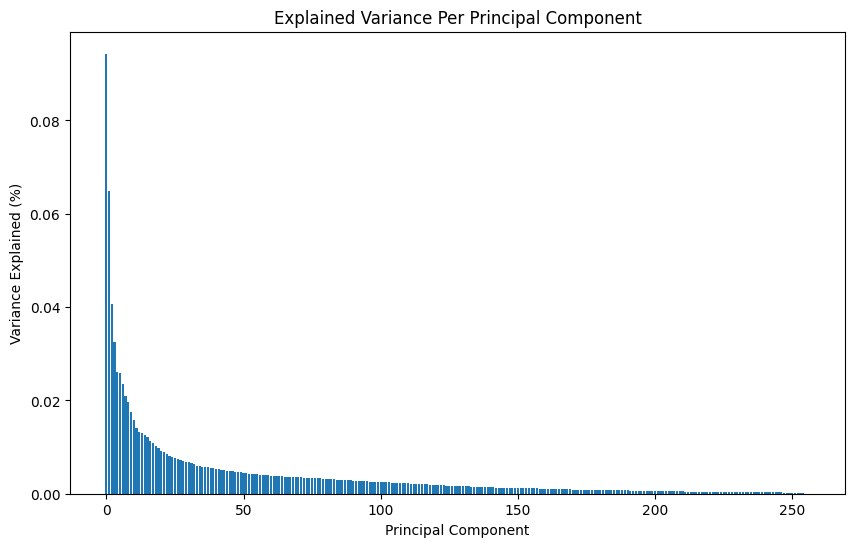

In [42]:
num_components=len(pca.explained_variance_ratio_)
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_
 
plt.figure(figsize=(10, 6))
plt.bar(ind, vals)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.title("Explained Variance Per Principal Component")

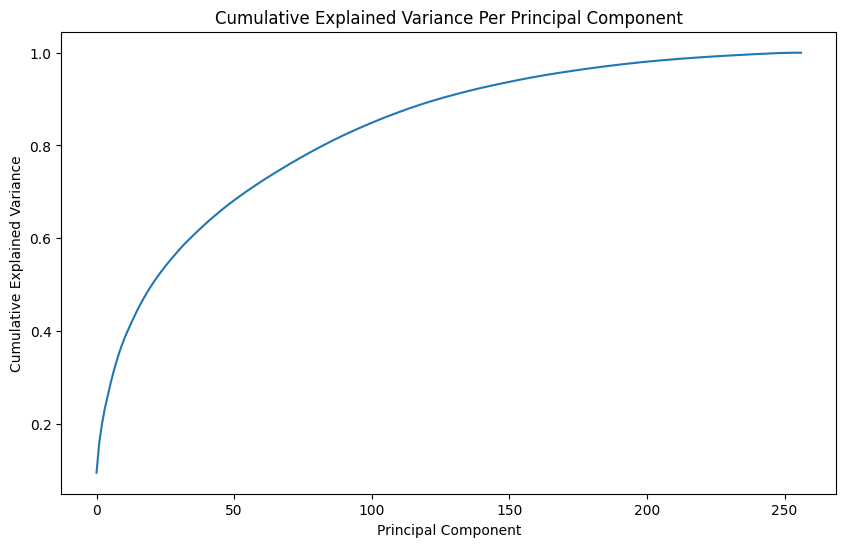

In [43]:
cum_vals = np.cumsum(vals)
plt.figure(figsize=(10, 6))
plt.plot(ind, cum_vals)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Per Principal Component");

The graphs show that the explained variance decreases rapidly. We decided to reduced the number of features to 75 with which we can still cover over 75% of the cumulative variance which seems like a good value.

In [44]:
# Re-apply PCA to the data while selecting for number of components to retain.
# I will use 75 components since they still get over 75% of the cumulative variance
pca_75 = PCA(n_components=75, random_state=42)
pca_75_data = pca_75.fit_transform(azdias_scaled)

In [45]:
pca_75.explained_variance_ratio_.sum()

0.7706758767796913

Now, we want to see how the data clusters in the principal components space. In this substep, we will apply k-means clustering to the dataset.

In [46]:
# Iterate over a number of different cluster counts...
scores = []
clusters = list(range(2, 30, 2))
for cluster_count in clusters:
    # run k-means clustering on the data and...
    kmeans= KMeans(n_clusters=cluster_count,random_state=25)
    model=kmeans.fit(pca_75_data)
    # compute the average within-cluster distances.
    score = np.abs(model.score(pca_75_data))
    scores.append(score)

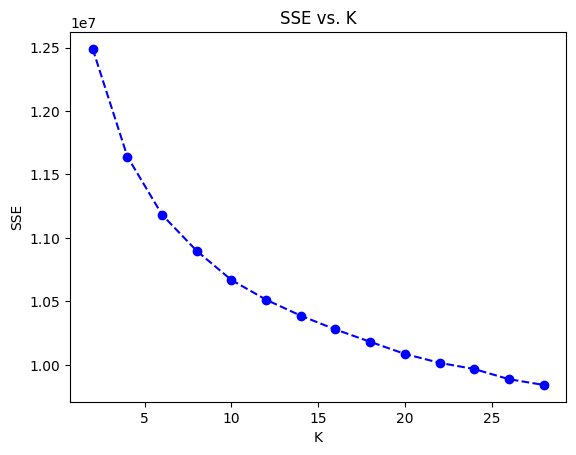

In [47]:
# Investigate the change in within-cluster distance across number of clusters.

plt.plot(clusters, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

Unfortunately there isn't a real elbow in the curve so there is no obvious choice for k. I decided to go with 12 since a dozen still seem reasonable and the benefit is still there. The gradient is still fairly steep while computing time won't be too big of an issue

In [48]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans= KMeans(n_clusters=12,random_state=25)
model=kmeans.fit(pca_75_data)
general_prediction = model.predict(pca_75_data)

In [49]:
pca_75_customer_data = pca_75.transform(scaled_customer_df)

In [50]:
customer_prediction = model.predict(pca_75_customer_data)

### Comparison between customer and general data

To answer our business question which people are more likely to be a customer we will compare two clusters in which the customer or general is over/underrepresented. This way we can look at the difference of the features of each cluster and see differences between the two groups

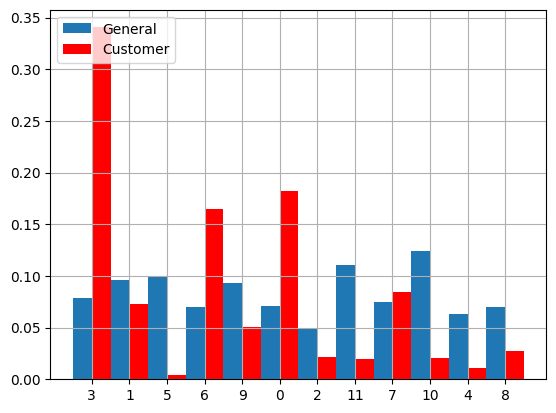

In [51]:
#used the solution from the knowledge base question 905904
from collections import Counter

# generating proportion for the customer clusters.
labels, values = zip(*Counter(customer_prediction).items())
v=list(values)
v[:] = [x/len(customer_prediction) for x in v]
indexes = np.arange(len(labels))
# generating proportion for the azdias clusters.
labels1, values1 = zip(*Counter(general_prediction).items())
v1=list(values1)
v1[:] = [x/len(general_prediction) for x in v1]
indexes1 = np.arange(len(labels))

# configuring the graph
width = .5
plt.bar(indexes1, v1, width ,label='General')
plt.bar(indexes+width, v, width,  color='r' , label='Customer')
plt.xticks(indexes + width * 0.5, labels)
plt.legend(loc='upper left')
plt.grid()
plt.show()


We can see for example that in Cluster 3 the percentage ofcustomers is way higher than the percentage of the general population, whereas in cluster 5 it is the other way around. We want to focus on these two clusters and their featueres to look at differences between the two groups

In [52]:
centroid_3 = scaler.inverse_transform(pca_75.inverse_transform(kmeans.cluster_centers_[3]).reshape(1, -1)).flatten()
centroid_5 = scaler.inverse_transform(pca_75.inverse_transform(kmeans.cluster_centers_[5]).reshape(1, -1)).flatten()
centroids=pd.DataFrame({"feature":customers_cleaned.columns,"centroid_3":centroid_3,"centroid_5":centroid_5})
centroids.head(30)

,feature,centroid_3,centroid_5
0,ANZ_HAUSHALTE_AKTIV,1.617793,11.810126
1,ANZ_HH_TITEL,0.012434,0.022241
2,ANZ_KINDER,0.138496,0.181341
3,ANZ_PERSONEN,2.249925,1.677953
4,ANZ_STATISTISCHE_HAUSHALTE,1.582996,10.495569
5,ANZ_TITEL,0.007960,0.000554
6,ARBEIT,2.992711,3.643413
7,BALLRAUM,4.225305,3.560378
8,CJT_GESAMTTYP,3.176351,4.038226
9,DSL_FLAG,0.998959,0.998069


In [53]:
centroids.tail(10)

,feature,centroid_3,centroid_5
247,W_KEIT_KIND_HH,4.078333,4.010314
248,WOHNDAUER_2008,8.537571,7.287414
249,WOHNLAGE,3.438088,3.591804
250,ZABEOTYP,2.336447,4.189060
251,ANREDE_KZ,1.478358,1.481815
252,ALTERSKATEGORIE_GROB,3.373701,1.682123
253,PRAEGENDE_JUGENDJAHRE_MOVEMENT,0.278683,0.943775
254,PRAEGENDE_JUGENDJAHRE_DECADE,3.537277,5.680836
255,WEALTH,2.184487,4.406426
256,LIFE_STAGE,3.590630,2.146565


Comparing the Customer Data to the general Population as an example I want to focus on 3 categories:

- ALTERSKATEGORIE_GROB: 
The value of 3.4 compared to 1.65 shows that older people (>60) are more popular for the mailing company 
- HH_EINKOMMEN_SCORE: 
The score of 2.90 equals a pretty high income whereas 5.75 for the general data is a really low income. So people with higher household incomes are more popular.
- ANZ_HAUSHALTE_AKTIV: 
It seems people that live in single family homes or smaller apartment building (score is 1.7) are more popular with the mailing company than people living in large apartment complexes (12.3 households)


#### In general we can observe that older and wealthier people with a higher living standard are more likely to be customers of the company

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [54]:
mailout_train = pd.read_csv('data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';', low_memory=False)

In [55]:
mailout_train.shape

(42962, 367)

In [56]:
mailout_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In order to perform our Analysis we have to perform similar cleaning steps like we did in part 1. However we modify our cleaning function this time to not drop any columns or rows based on missing data.
Additionally we have to add the RESPONS column to our described features list so it doens't get dropped.

In [57]:
new_row_response = pd.DataFrame([{
    'Feature': 'RESPONSE',
    'Type': 'ordinal',
    'Unknown': '[]'
}])

new_features = pd.concat([azdias_features, new_row_response], ignore_index=True)

In [58]:
def clean_data_2(df,azdias_features):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: DataFrame
    OUTPUT: Trimmed and cleaned DataFrame
    """
    
    #convcert the features of azdias and features file to a list
    features_list = azdias_features['Feature'].tolist()
    #drop all columns not in the features list
    df = df[df.columns.intersection(features_list)]
    
    #Convert Missing Value Codes to NaNs
    for Feature, unknown_values in zip(azdias_features['Feature'], azdias_features['Unknown']):
        if unknown_values[0] != '':
            for value in unknown_values:
                # check if value is numeric (remove - for negative numbers)
                if value.isnumeric() or value.lstrip('-').isnumeric():
                    value = int(value)
                df[Feature] = df[Feature].replace(value, np.nan)

    #df.drop(columns=drop_columns,axis=1,inplace=True)
    
    #Encode the OST_WEST_KZ. We will use a 1 for W and 0 for 0
    df["OST_WEST_KZ"].replace({'W':1,'O':0},inplace=True)
    # drop categories
    df.drop(['CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN'], axis=1, inplace=True)
    
    
    mainstream = [1, 3, 5, 8, 10, 12, 14] 
    df['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: 1 if x in mainstream else 0)
    #Cluster the decades
    decade_cluster ={1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}

    df['PRAEGENDE_JUGENDJAHRE_DECADE'] = df['PRAEGENDE_JUGENDJAHRE']
    df['PRAEGENDE_JUGENDJAHRE_DECADE'].replace(decade_cluster, inplace=True)
    df.drop(['PRAEGENDE_JUGENDJAHRE'], axis = 1, inplace=True)

    df['WEALTH'] = df['CAMEO_INTL_2015'].apply(lambda x: np.floor(pd.to_numeric(x)/10))
    df['LIFE_STAGE'] = df['CAMEO_INTL_2015'].apply(lambda x: pd.to_numeric(x)%10)
    
    df.drop(['CAMEO_INTL_2015'], axis = 1, inplace=True)
    
    df.drop(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB'], axis=1, inplace=True)

    # Return the cleaned dataframe.
    
    return df

In [59]:
mailout_train_cleaned = clean_data_2(mailout_train,new_features)

/tmp/ipykernel_31/636833066.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[Feature] = df[Feature].replace(value, np.nan)
/tmp/ipykernel_31/636833066.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OST_WEST_KZ"].replace({'W':1,'O':0},inplace=True)
/tmp/ipykernel_31/636833066.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['CAMEO_DEUG_2015', 'CAMEO_D

In [60]:
mailout_train_cleaned.shape

(42962, 331)

In [61]:
mailout_train_cleaned_imp = pd.DataFrame(imputer.fit_transform(mailout_train_cleaned), columns=mailout_train_cleaned.columns)

In [62]:
print('We still have this number of missing values: ', mailout_train_cleaned_imp.isna().sum().sum())

We still have this number of missing values:  0


After imputing we split the dataset in our target Column y with the response value and then Scale the remaing values (y column is already scaled using only 0 and 1)

In [63]:
y = mailout_train_cleaned_imp['RESPONSE']

In [64]:
mailout_train_cleaned_imp_scaled = pd.DataFrame(scaler.fit_transform(mailout_train_cleaned_imp), columns=mailout_train_cleaned_imp.columns)

In [65]:
X = mailout_train_cleaned_imp_scaled.drop('RESPONSE',axis=1)


### Model Training

Now it's time to train our Machine Learning models and choose the best model. To evaluate the models, we choose to use the roc_auc score which summarizes the classifier's performance to identify false and negatives.
We will look at a variety of classifier ranging from easy models like the Naive Bayes Classifier and look at a lot of Ensemble methods which have there strengths in prediciting such problems. Fur further information about the classifier we recommend the documentation from sklearn.

In [66]:
def classify(clf, param_grid, X_train=X, y_train=y):
    """
    Use a classifier to fit the data and get the roc score
    
    INPUT:
    - clf: type of classifier 
    - param_grid: grid of parameters used with GridSearch to optimize the model
    - X_train (DataFrame): training input
    - y_train (DataFrame): training output
            
    OUTPUT:
    - classifier with best paramaters
    """
    t_start = time.time()
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='roc_auc', cv=3)
    grid.fit(X_train, y_train)
    t_end = time.time()
    print('Computung_time: ',t_end-t_start)
    print(grid.best_score_)
    
    return grid.best_estimator_

In [67]:
dtc = DecisionTreeClassifier(random_state=42)
classify(dtc, {})

Computung_time:  10.332142353057861
0.510248363397528


DecisionTreeClassifier(random_state=42)

In [68]:
gnb = GaussianNB() #has no random state
classify(gnb, {})

Computung_time:  0.6948196887969971
0.5861457577808918


GaussianNB()

In [69]:
# RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
classify(rfc, {})

Computung_time:  40.45813727378845
0.6070916428870518


RandomForestClassifier(random_state=42)

In [70]:
# AdaBoostClassifier
abc = AdaBoostClassifier(random_state=42)
abc_best_est = classify(abc, {})

/opt/venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Computung_time:  42.41996669769287
0.7183030490182123


In [71]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=12)
classify(gbc, {})

Computung_time:  199.72479510307312
0.7665389908548969


GradientBoostingClassifier(random_state=12)

As seen above the GradientBoosting Classifier has the best roc score without tuning but also had the longest computing time. For that reason we choose the ADA boost classifier to further optimize with Grid Search

In [72]:
# Use GridSearchCV to optimizt model
# use SAMME algorithim as suggested above
param_grid = {'algorithm': ['SAMME'],
              'learning_rate': [0.1, 1, 5],
              'n_estimators':[10,100,200],
              'random_state': [42]
             }

abc_best_est = classify(abc, param_grid)
abc_best_est

Computung_time:  556.2286927700043
0.7688237500439433


AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=200,
                   random_state=42)

Now we can use this optimized model to make predictions for our test set

### Predict probabilities of test set 

In [73]:
mailout_test = pd.read_csv('data/Udacity_MAILOUT_052018_TEST.csv', sep=';', low_memory=False)

In [74]:
mailout_test_cleaned = clean_data_2(mailout_test,azdias_features)

/tmp/ipykernel_31/636833066.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[Feature] = df[Feature].replace(value, np.nan)
/tmp/ipykernel_31/636833066.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OST_WEST_KZ"].replace({'W':1,'O':0},inplace=True)
/tmp/ipykernel_31/636833066.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['CAMEO_DEUG_2015', 'CAMEO_D

In [75]:
mailout_test_cleaned_imp = pd.DataFrame(imputer.fit_transform(mailout_test_cleaned), columns=mailout_test_cleaned.columns)

In [76]:
mailout_test_cleaned_imp_scaled = pd.DataFrame(scaler.fit_transform(mailout_test_cleaned_imp), columns=mailout_test_cleaned_imp.columns)

In [77]:
mailout_test_cleaned_imp_scaled.shape

(42833, 330)

In [78]:
test_prediction=abc_best_est.predict_proba(mailout_test_cleaned_imp_scaled)
test_prediction

array([[0.74381369, 0.25618631],
       [0.74466177, 0.25533823],
       [0.84541622, 0.15458378],
       ...,
       [0.76853398, 0.23146602],
       [0.74984921, 0.25015079],
       [0.7579341 , 0.2420659 ]])

With this array we get the probabilities of each person in the test set to be a customer(row 2). As of know all the values are pretty similiar and seem a bit high (In the training set only 1,2% of people became customers so values over 20% probability seem too high). With further model optimization this could be reduced.

### Next Steps

A lot of assumptions had to be taken in order to use the provided data to analyze the customer base. In order to enhance the performance of our model the following steps seem like a good point to start:
- Further feature optimization:
Which features are most important? Are there some missing features? Can we summarize certain features together? Which features are codependent?
- How should we handle missing data?
Was the approach to drop columns and rows really the best approach? Should we impute in a different way?
- Model optimization:
Should be perform different cleaning steps for the Machine Learning models? Should we also drop more features?